In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy

In [50]:
dfmovies = pd.read_csv('../Datasets/Movies/movies_description.txt', sep='|', header=None)
dfusers = pd.read_csv('../Datasets/Movies/users_description.txt', sep='|', header=None)
dfscores = pd.read_csv('../Datasets/Movies/movies_users.txt', sep='\t', header=None)

In [51]:
dfmovies.columns = ['id', 'title', 'date', 'NA', 'link', 'Unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
genres = ['Unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
moviesT = dfmovies.values[:,1]

In [52]:
nusers = len(dfusers.values)
nmovies = len(dfmovies.values)
evaluations = np.zeros((nmovies,nusers))
evaluations[dfscores.values[:,1] - 1, dfscores.values[:,0] - 1] = dfscores.values[:,2]
avgs = []
for i in range(len(evaluations)):
    avgs.append((np.sum(evaluations[i]) / np.sum(evaluations[i,:] !=0)) / 5)

df = dfmovies[genres].copy()
df['Avg'] = avgs
df.index = moviesT
df

,Unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Avg
Toy Story (1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.775664
GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.641221
Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.606667
Get Shorty (1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.710048
Copycat (1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0.660465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mat' i syn (1997),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.200000
B. Monkey (1998),0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.600000
Sliding Doors (1998),0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.400000
You So Crazy (1994),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.600000


In [53]:
Z = hierarchy.linkage(df, method = 'ward')

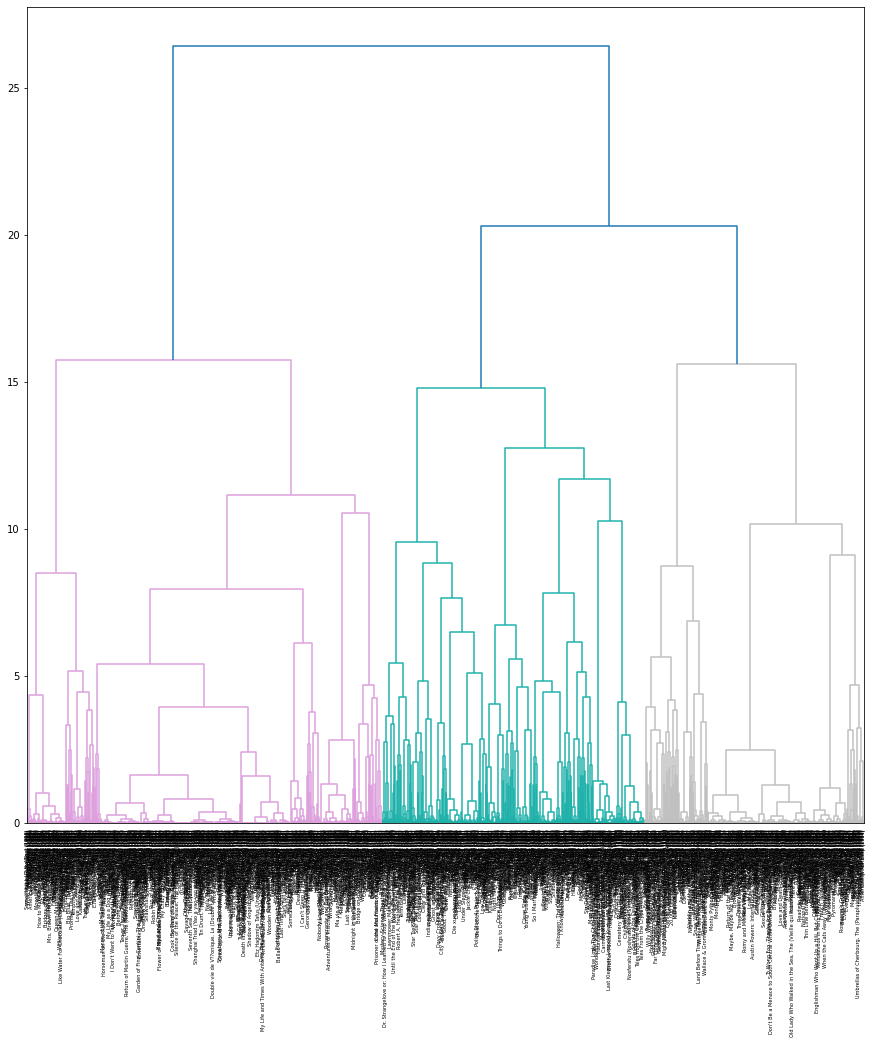

In [77]:
"""
plt.figure(figsize=(15,15))
hierarchy.set_link_color_palette(['plum','lightseagreen', 'silver'])
dn = hierarchy.dendrogram(Z, labels=moviesT)
plt.show()
"""

In [55]:
for i in range(len(dfmovies)):
    print(dfmovies['id'][i], dfmovies['title'][i])

1 Toy Story (1995)
2 GoldenEye (1995)
3 Four Rooms (1995)
4 Get Shorty (1995)
5 Copycat (1995)
6 Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
7 Twelve Monkeys (1995)
8 Babe (1995)
9 Dead Man Walking (1995)
10 Richard III (1995)
11 Seven (Se7en) (1995)
12 Usual Suspects, The (1995)
13 Mighty Aphrodite (1995)
14 Postino, Il (1994)
15 Mr. Holland's Opus (1995)
16 French Twist (Gazon maudit) (1995)
17 From Dusk Till Dawn (1996)
18 White Balloon, The (1995)
19 Antonia's Line (1995)
20 Angels and Insects (1995)
21 Muppet Treasure Island (1996)
22 Braveheart (1995)
23 Taxi Driver (1976)
24 Rumble in the Bronx (1995)
25 Birdcage, The (1996)
26 Brothers McMullen, The (1995)
27 Bad Boys (1995)
28 Apollo 13 (1995)
29 Batman Forever (1995)
30 Belle de jour (1967)
31 Crimson Tide (1995)
32 Crumb (1994)
33 Desperado (1995)
34 Doom Generation, The (1995)
35 Free Willy 2: The Adventure Home (1995)
36 Mad Love (1995)
37 Nadja (1994)
38 Net, The (1995)
39 Strange Days (1995)
40 To Wong Foo, Than

In [12]:
favMovies = list(map(int,input("Write 5 ID's of your favourite movies: ").strip().split()))[:5]

Write 5 ID's of your favourite movies: 1 288 50 71 313


In [57]:
#favMovies = [1, 29, 35, 50, 55, 71, 82, 91, 95, 288, 543, 993]
print("Your favorite movies are:")
[print("", moviesT[i - 1], sep = '\t') for i in favMovies]
print('\nWe think you might like:')
alreadyRecommended = []
for m in favMovies:
    foundMovie = False
    threshold = 0.0
    while(True):
        g = hierarchy.fcluster(Z, criterion='distance', t = threshold)
        p = m - 1
        rMovies = g == g[p]
        rMovies = np.where(rMovies)[0]
        for possibleMovie in rMovies:
            pM = possibleMovie + 1
            if pM not in favMovies and pM not in alreadyRecommended:
                print('\t\t', pM, moviesT[possibleMovie])
                #print(threshold, pM, moviesT[possibleMovie])
                alreadyRecommended.append(pM)
                foundMovie = True
                break
        if foundMovie: break
        threshold += 0.1

Your favorite movies are:
	Toy Story (1995)
	Batman Forever (1995)
	Free Willy 2: The Adventure Home (1995)
	Star Wars (1977)
	Professional, The (1994)
	Lion King, The (1994)
	Jurassic Park (1993)
	Nightmare Before Christmas, The (1993)
	Aladdin (1992)
	Scream (1996)
	Mis??ables, Les (1995)
	Hercules (1997)

We think you might like:
		 422 Aladdin and the King of Thieves (1996)
		 231 Batman Returns (1992)
		 78 Free Willy (1993)
		 181 Return of the Jedi (1983)
		 129 Bound (1996)
		 99 Snow White and the Seven Dwarfs (1937)
		 222 Star Trek: First Contact (1996)
		 419 Mary Poppins (1964)
		 1219 Goofy Movie, A (1995)
		 895 Scream 2 (1997)
		 1121 Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)
		 63 Santa Clause, The (1994)


# Interesting


- Code that gives you extra information.
- *Not used in the recommendation system.*

In [72]:
#Gives you the movies that share genre with your fav ones.
for m in favMovies:
    print(moviesT[m - 1])
    r = dfmovies.loc[dfmovies['id'] == m]
    for g in genres:
        print('\t', g, end = ' ')
        if r[g].all(): 
            similarMovies = dfmovies.loc[dfmovies[g] == True]
            print()
            [print('\t\t', i) for i in similarMovies['title']]
        else: print(0)
    print()

Toy Story (1995)
	 Unknown 0
	 Action 0
	 Adventure 0
	 Animation 
		 Toy Story (1995)
		 Lion King, The (1994)
		 Aladdin (1992)
		 Snow White and the Seven Dwarfs (1937)
		 Heavy Metal (1981)
		 Aristocats, The (1970)
		 All Dogs Go to Heaven 2 (1996)
		 Wallace & Gromit: The Best of Aardman Animation (1996)
		 Wrong Trousers, The (1993)
		 Grand Day Out, A (1992)
		 Akira (1988)
		 Beavis and Butt-head Do America (1996)
		 Pinocchio (1940)
		 Close Shave, A (1995)
		 Cinderella (1950)
		 Alice in Wonderland (1951)
		 Aladdin and the King of Thieves (1996)
		 Transformers: The Movie, The (1986)
		 Fantasia (1940)
		 James and the Giant Peach (1996)
		 Dumbo (1941)
		 Anastasia (1997)
		 Pocahontas (1995)
		 Beauty and the Beast (1991)
		 Hunchback of Notre Dame, The (1996)
		 Three Caballeros, The (1945)
		 Sword in the Stone, The (1963)
		 Space Jam (1996)
		 Fox and the Hound, The (1981)
		 Winnie the Pooh and the Blustery Day (1968)
		 Cats Don't Dance (1997)
		 Hercules (1997)
		

		 Getting Away With Murder (1996)
		 8 Heads in a Duffel Bag (1997)
		 Wedding Bell Blues (1996)
		 Tainted (1998)
		 You So Crazy (1994)
	 Crime 
		 Copycat (1995)
		 Seven (Se7en) (1995)
		 Usual Suspects, The (1995)
		 From Dusk Till Dawn (1996)
		 Rumble in the Bronx (1995)
		 Batman Forever (1995)
		 Strange Days (1995)
		 Professional, The (1994)
		 Pulp Fiction (1994)
		 Mask, The (1994)
		 Carlito's Way (1993)
		 True Romance (1993)
		 Fargo (1996)
		 Striptease (1996)
		 Godfather, The (1972)
		 Bound (1996)
		 Kansas City (1996)
		 Reservoir Dogs (1992)
		 GoodFellas (1990)
		 Godfather: Part II, The (1974)
		 Sting, The (1973)
		 Batman Returns (1992)
		 Sneakers (1992)
		 Grosse Pointe Blank (1997)
		 Batman & Robin (1997)
		 Heat (1995)
		 Donnie Brasco (1997)
		 Hoodlum (1997)
		 L.A. Confidential (1997)
		 Devil's Advocate, The (1997)
		 Deceiver (1997)
		 Midnight in the Garden of Good and Evil (1997)
		 Cop Land (1997)
		 Desperate Measures (1998)
		 Kiss the Girls (1

		 Love in the Afternoon (1957)
		 Shall We Dance? (1937)
		 Jack and Sarah (1995)
		 Country Life (1994)
		 Love Affair (1994)
		 Penny Serenade (1941)
		 'Til There Was You (1997)
		 Inventing the Abbotts (1997)
		 Crude Oasis, The (1995)
		 1-900 (1994)
		 For the Moment (1994)
		 Hotel de Love (1996)
		 Love and Other Catastrophes (1996)
		 Roseanna's Grave (For Roseanna) (1997)
		 Fall (1997)
		 Swept from the Sea (1997)
		 Picture Bride (1995)
		 When Night Is Falling (1995)
		 I Like It Like That (1994)
		 Sliding Doors (1998)
		 Shooting Fish (1997)
		 Mr. Jones (1993)
		 Moonlight and Valentino (1995)
		 Golden Earrings (1947)
		 Damsel in Distress, A (1937)
		 Thieves (Voleurs, Les) (1996)
		 Nina Takes a Lover (1994)
		 Man in the Iron Mask, The (1998)
		 Colonel Chabert, Le (1994)
		 Even Cowgirls Get the Blues (1993)
		 Modern Affair, A (1995)
		 Naked in New York (1994)
		 Wings of Courage (1995)
		 Mr. Wonderful (1993)
		 Object of My Affection, The (1998)
		 Witness (19

		 Gumby: The Movie (1995)
		 Little Princess, The (1939)
		 Herbie Rides Again (1974)
		 Gold Diggers: The Secret of Bear Mountain (1995)
		 Far From Home: The Adventures of Yellow Dog (1995)
		 Amazing Panda Adventure, The (1995)
		 Secret Adventures of Tom Thumb, The (1993)
		 Buddy (1997)
		 Warriors of Virtue (1997)
	 Comedy 0
	 Crime 0
	 Documentary 0
	 Drama 0
	 Fantasy 0
	 Film-Noir 0
	 Horror 0
	 Musical 
		 Muppet Treasure Island (1996)
		 Lion King, The (1994)
		 Nightmare Before Christmas, The (1993)
		 Aladdin (1992)
		 Snow White and the Seven Dwarfs (1937)
		 All Dogs Go to Heaven 2 (1996)
		 Wizard of Oz, The (1939)
		 Bedknobs and Broomsticks (1971)
		 Sound of Music, The (1965)
		 Dirty Dancing (1987)
		 Blues Brothers, The (1980)
		 This Is Spinal Tap (1984)
		 Pink Floyd - The Wall (1982)
		 Evita (1996)
		 Everyone Says I Love You (1996)
		 Spice World (1997)
		 Blues Brothers 2000 (1998)
		 Cinderella (1950)
		 Mary Poppins (1964)
		 Alice in Wonderland (1951)
		 

		 Money Talks (1997)
		 That Darn Cat! (1997)
		 Money Talks (1997)
		 Flubber (1997)
		 For Richer or Poorer (1997)
		 Home Alone 3 (1997)
		 Mr. Magoo (1997)
		 Big Lebowski, The (1998)
		 Ma vie en rose (My Life in Pink) (1997)
		 Vermin (1998)
		 Half Baked (1998)
		 Love and Death on Long Island (1997)
		 Down Periscope (1996)
		 Harriet the Spy (1996)
		 First Kid (1996)
		 Brassed Off (1996)
		 Smile Like Yours, A (1997)
		 Airheads (1994)
		 With Honors (1994)
		 Renaissance Man (1994)
		 Charade (1963)
		 Booty Call (1997)
		 Blue in the Face (1995)
		 Unstrung Heroes (1995)
		 Pushing Hands (1992)
		 Dazed and Confused (1993)
		 Month by the Lake, A (1995)
		 Funny Face (1957)
		 Hear My Song (1991)
		 Mediterraneo (1991)
		 Beautician and the Beast, The (1997)
		 Head Above Water (1996)
		 Hercules (1997)
		 Kiss Me, Guido (1997)
		 Big Green, The (1995)
		 Stuart Saves His Family (1995)
		 Cabin Boy (1994)
		 Clean Slate (1994)
		 Lightning Jack (1994)
		 Stupids, The (199

		 Casper (1995)
		 Baby-Sitters Club, The (1995)
		 Richie Rich (1994)
		 Andre (1994)
		 Space Jam (1996)
		 Alaska (1996)
		 Bogus (1996)
		 Pollyanna (1960)
		 Shaggy Dog, The (1959)
		 Jingle All the Way (1996)
		 That Darn Cat! (1997)
		 Flubber (1997)
		 Home Alone 3 (1997)
		 Harriet the Spy (1996)
		 First Kid (1996)
		 Fox and the Hound, The (1981)
		 Indian in the Cupboard, The (1995)
		 Winnie the Pooh and the Blustery Day (1968)
		 Cats Don't Dance (1997)
		 Hercules (1997)
		 Big Green, The (1995)
		 That Darn Cat! (1997)
		 Shiloh (1997)
		 Lassie (1994)
		 Little Big League (1994)
		 Homeward Bound II: Lost in San Francisco (1996)
		 Adventures of Pinocchio, The (1996)
		 Little Princess, A (1995)
		 Balto (1995)
		 Pagemaster, The (1994)
		 Oliver & Company (1988)
		 Pete's Dragon (1977)
		 Escape to Witch Mountain (1975)
		 Zeus and Roxanne (1997)
		 Kim (1950)
		 Goofy Movie, A (1995)
		 Wild America (1997)
		 Simple Wish, A (1997)
		 Star Kid (1997)
		 Kazaam (1996)

In [73]:
#How many movies we have by genre
for g in genres:
    similarMovies = dfmovies.loc[dfmovies[g] == True]
    print(g, len(similarMovies))

Unknown 2
Action 251
Adventure 135
Animation 42
Children's 122
Comedy 505
Crime 109
Documentary 50
Drama 725
Fantasy 22
Film-Noir 24
Horror 92
Musical 56
Mystery 61
Romance 247
Sci-Fi 101
Thriller 251
War 71
Western 27


In [76]:
#Movies that belong to a specific genre
similarMovies = dfmovies.loc[dfmovies['Unknown'] == True]
print(similarMovies['title'])

266                 unknown
1372    Good Morning (1971)
Name: title, dtype: object
